<a href="https://colab.research.google.com/github/Arti66x/TPNS_lab1/blob/main/TPNS_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import chardet
with open('/content/ID_data_mass_18122012.csv', 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv('/content/ID_data_mass_18122012.csv',sep=';', encoding=result['encoding'])
df=df.apply(lambda x: x.str.replace(',','.'))

                                                    # приведем таблицу в приличный вид
headers = df.values[0,2:].tolist()
headers[headers.index('Pлин')]='Рлин' 
d = {}
for i in range(len(headers)):
  if(d.get(headers[i])!= None):
    d[headers[i]]+=1
    headers[i] = headers[i]+'_'+str(d[headers[i]])
  else:
    d[headers[i]]=1
df.drop([0,1], axis=0, inplace=True)
df.drop([df.columns[0],df.columns[1]], axis=1, inplace=True)
df.columns = headers
df = df.reset_index(drop=True)
for i in df.columns:                                  
  df[i]=pd.to_numeric(df[i],errors = 'coerce')
for i in range(len(df)):                                            
      if((pd.isnull(df['КГФ'][i]))&(pd.notnull(df['КГФ_2'][i]))):
           df['КГФ'][i] = df['КГФ_2'][i] *1000
df.drop('КГФ_2', axis=1, inplace=True)
df.dropna(how = "all", subset=['КГФ','G_total'], inplace=True)
df = df.reset_index(drop=True)
df

,Глубина манометра,Dшт,Руст,Рзаб,Рлин,Руст_2,Рзаб_2,Рлин_2,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды_2,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб_2,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.60,370.1,101.80,249.0,359.6,101.80,53.0,31.7,103.20,32.50,214.70,83.6,0.40,231.25,1610.37,131.3,0.4,56.80,45.25,56.5,NaN,93.6,92.38,0.806,801.0,1000.0,0.6694,2.78,311.91
1,3576.3,9.53,233.50,364.6,101.30,231.0,338.1,102.40,58.8,37.6,103.00,38.60,290.59,104.7,1.40,309.00,2310.23,158.5,1.4,56.80,45.25,56.5,NaN,92.9,91.69,0.806,801.0,1000.0,0.6694,3.70,288.60
2,3576.3,11.11,213.40,357.1,101.60,211.0,314.8,100.60,63.6,42.8,102.60,43.40,368.04,114.3,1.90,388.11,3039.49,172.3,1.9,56.80,45.25,56.5,NaN,91.4,90.20,0.806,801.0,1000.0,0.6694,4.52,248.79
3,3576.3,12.70,191.60,347.4,98.40,187.0,291.5,99.00,64.7,46.2,102.00,46.10,434.66,121.3,3.30,455.21,3824.08,181.5,3.3,56.80,45.25,56.5,NaN,89.2,88.03,0.806,801.0,1000.0,0.6694,5.22,223.56
4,3576.3,14.29,171.90,337.7,99.20,169.0,270.3,99.50,64.0,49.4,104.40,49.90,483.28,129.8,4.60,504.59,4299.10,190.6,4.7,56.80,45.25,56.5,NaN,89.7,88.53,0.806,801.0,1000.0,0.6694,5.77,215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3284.0,12.70,215.00,307.8,98.60,215.0,308.1,97.20,65.0,45.8,104.78,46.30,479.09,93.5,4.70,495.63,4165.00,156.8,4.8,44.50,35.28,40.5,41.6,94.4,93.17,NaN,782.0,NaN,0.6600,NaN,153.00
89,3284.0,14.29,198.00,293.6,98.50,197.0,293.9,98.40,66.9,49.8,104.63,50.50,568.50,106.6,6.40,587.36,5113.00,174.3,6.5,44.50,35.28,40.5,41.6,94.0,92.77,NaN,782.0,NaN,0.6600,NaN,147.00
90,3288.6,7.94,231.23,309.1,92.60,230.0,307.1,92.70,51.0,NaN,104.40,28.10,215.80,50.5,0.45,224.86,1759.00,84.7,0.4,48.37,33.21,NaN,NaN,89.9,88.72,NaN,779.6,NaN,0.6700,NaN,182.00
91,3288.6,11.11,217.20,293.9,93.10,215.0,293.9,93.30,60.0,NaN,104.60,41.30,387.68,72.0,1.50,403.75,3454.00,123.0,1.6,48.37,33.21,NaN,NaN,90.8,89.61,NaN,779.6,NaN,0.6700,NaN,145.00


In [ ]:
#Непрерывные признаки
def dist_properties(df):
  index = df.columns
  d = {}
  d['Кол-во']= [] 
  d['% пропусков']= []
  d['Минимум']= []
  d['Максимум']= []
  d['Среднее']= []
  d['Мощность']= []
  d['% уникальных']= []
  d['Первый квартиль(0.25)']= []
  d['Медиана']= []
  d['Второй квартиль(0.75)']= []
  d['Стандартное отклонение']= []
  for h in df.columns:
    d['Кол-во'].append(df[h].count())
    d['% пропусков'].append(df[h].isna().sum()/len(df)*100)
    d['Минимум'].append(df[h].min())
    d['Максимум'].append(df[h].max())
    d['Среднее'].append(df[h].mean())
    d['Мощность'].append(df[h].nunique())
    d['% уникальных'].append(df[h].nunique()/df[h].count()*100)
    d['Первый квартиль(0.25)'].append(df[h].quantile(0.25))
    d['Медиана'].append(df[h].median())
    d['Второй квартиль(0.75)'].append(df[h].quantile(0.75))
    d['Стандартное отклонение'].append(df[h].std())
  return pd.DataFrame(d, index)
tab =  dist_properties(df)
tab

,Кол-во,% пропусков,Минимум,Максимум,Среднее,Мощность,% уникальных,Первый квартиль(0.25),Медиана,Второй квартиль(0.75),Стандартное отклонение
Глубина манометра,90,3.225806,3276.0000,3670.0000,3524.086667,20,22.222222,3427.6250,3579.000,3652.2500,144.474862
Dшт,93,0.000000,6.3500,15.8800,10.951183,10,10.752688,9.5300,11.110,12.7000,2.423172
Руст,93,0.000000,138.1600,337.1100,228.293871,87,93.548387,201.6400,229.890,252.0000,41.897056
Рзаб,90,3.225806,174.0000,458.6000,331.762222,88,97.777778,297.7975,337.790,364.1500,56.481226
Рлин,93,0.000000,73.3100,121.6800,99.861075,90,96.774194,95.9500,100.800,103.8700,7.300709
Руст_2,93,0.000000,136.0000,333.0000,227.644624,73,78.494624,200.0000,228.000,252.0000,41.757260
Рзаб_2,90,3.225806,174.0000,458.5000,330.334444,89,98.888889,294.6250,334.250,362.1500,56.357493
Рлин_2,93,0.000000,40.7400,123.6200,98.005376,87,93.548387,95.3400,100.260,104.0000,12.425643
Туст,93,0.000000,24.2000,75.0000,56.172043,51,54.838710,50.3000,58.000,64.0000,11.250781
Тна шлейфе,60,35.483871,14.0000,110.2000,43.091667,57,95.000000,33.3000,38.700,46.3750,19.602337


In [ ]:
removed = []
cat_index = []
cont_index = []
for i in tab.index:
  if tab['% пропусков'][i]>60 and i!='G_total':
    print(i, ' больше 60% пропусков')
    removed.append(i)
    continue
  if tab['Мощность'][i]==1:
    print(i, ' мощность 1')
    removed.append[i]
    continue
  if tab['Мощность'][i]<25:
    cat_index.append(i)
  else:
    cont_index.append(i)
df.drop(removed,axis=1, inplace=True)

Ro_g  больше 60% пропусков
Ro_w  больше 60% пропусков


In [ ]:
#Категориальные признаки
def cat_dist_properties(df):

  d = {}
  d['Кол-во']= []
  d['% пропусков']= []
  d['Мощность']= []
  for j in (0,1):
    d['Мода'+str(j+1)]= [] 
    d['Частота моды'+str(j+1)] = [] 
    d['% моды'+str(j+1)] = []

  for i in cat_index:
    d['Кол-во'].append(df[i].count())
    d['% пропусков'].append(df[i].isna().sum()/len(df)*100)
    d['Мощность'].append(df[i].nunique())
    vc = df[i].value_counts()
    for j in (0,1):
      m = vc.index[j]
      m_count = vc[m]
      m_p = m_count/d['Кол-во'][cat_index.index(i)]*100
      d['Мода'+str(j+1)].append(m)
      d['Частота моды'+str(j+1)].append(m_count)
      d['% моды'+str(j+1)].append(m_p)
  return pd.DataFrame(d, cat_index)
tab2 = cat_dist_properties(df)
tab2


,Кол-во,% пропусков,Мощность,Мода1,Частота моды1,% моды1,Мода2,Частота моды2,% моды2
Глубина манометра,90,3.225806,20,3667.00,9,10.000000,3653.00,9,10.000000
Dшт,93,0.000000,10,9.53,21,22.580645,12.70,18,19.354839
Нэф,93,0.000000,14,63.60,17,18.279570,44.50,15,16.129032
Рпл. Тек (послед точка на КВД),88,5.376344,21,53.27,7,7.954545,47.33,7,7.954545
Рпл. Тек (Расчет по КВД),81,12.903226,18,48.30,11,13.580247,56.70,7,8.641975
Рпл. Тек (Карноухов),64,31.182796,13,52.70,7,10.937500,55.20,7,10.937500
Удельная плотность газа,93,0.000000,12,0.67,24,25.806452,0.66,18,19.354839
G_total,23,75.268817,23,5.77,1,4.347826,8.40,1,4.347826


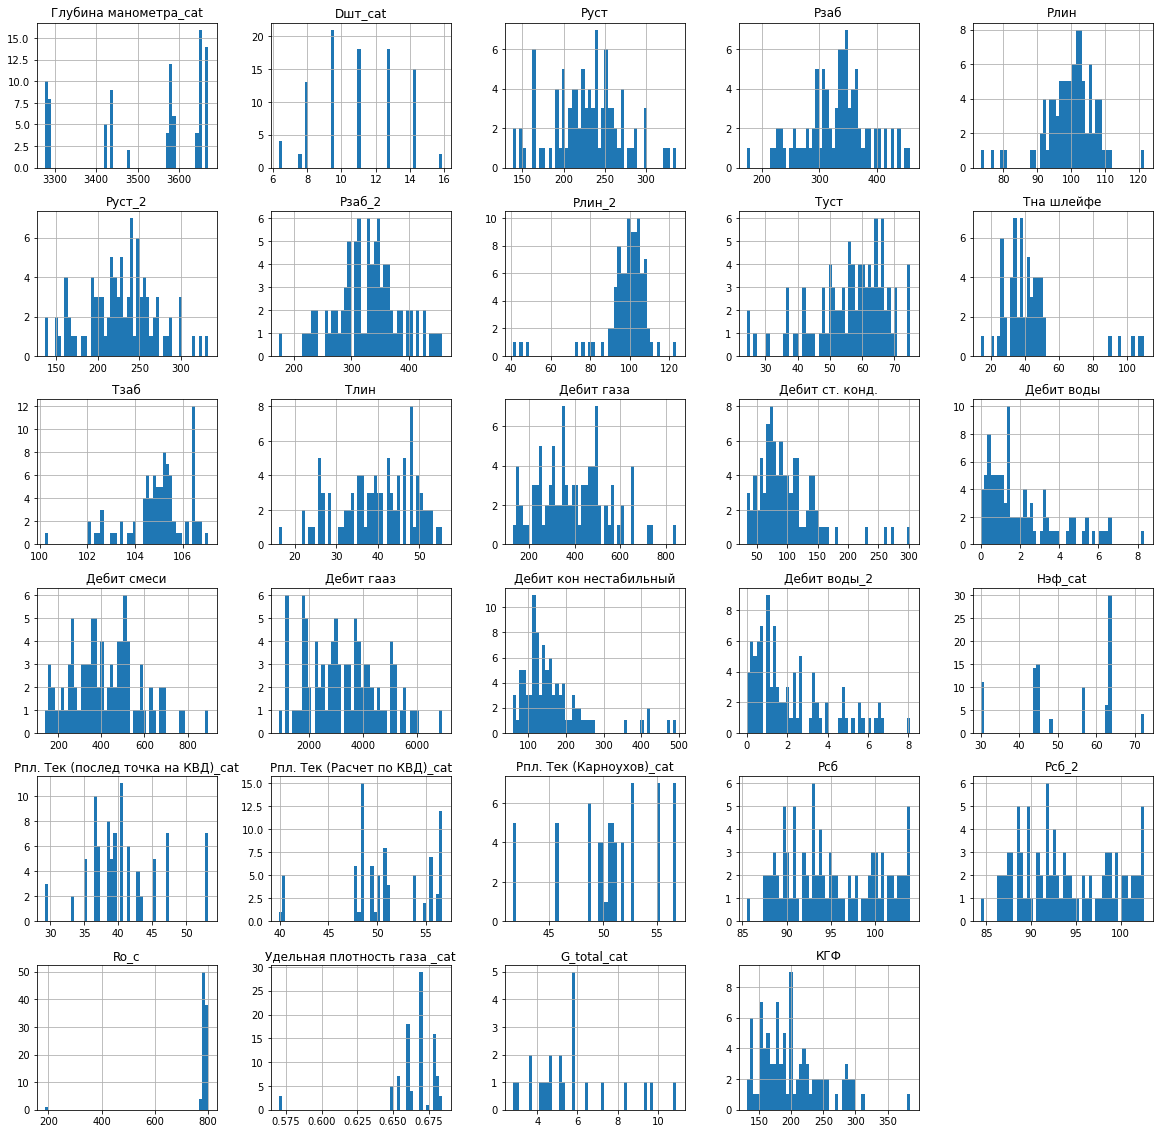

In [ ]:
# Распределение
df.rename(columns = {cat_index[i]:cat_index[i]+'_cat' for i in range(len(cat_index))}).hist(bins=50,figsize=(20,20))
pass


Выбросы у непрерывных признаков
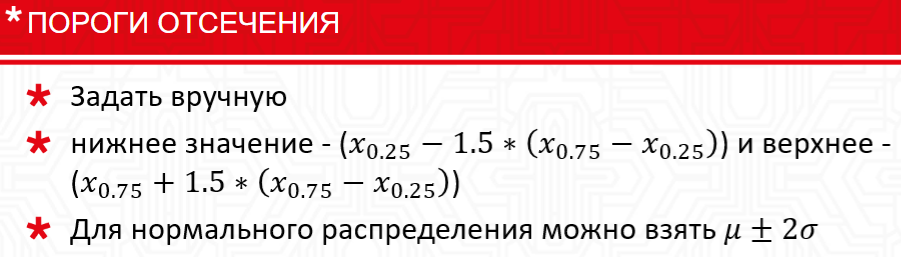




Пропуски
* Если доля пропущенных значений признака выше 60%, такой признак стоит игнорировать
* Меньше 30% дополняем медианой или средним

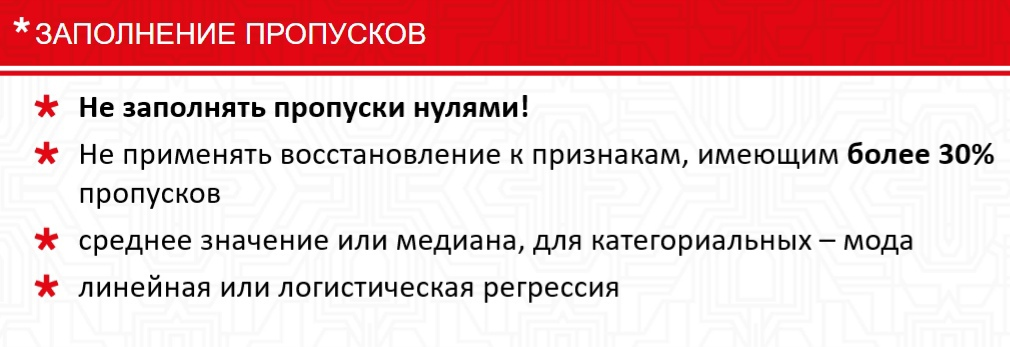

Руст 144.49975874165074 312.0879831938331
16
20
23
24
71
Рзаб 218.79976944552146 444.7246749989229
23
24
71
72
Рлин 85.25965709398844 114.46249344364614
19
20
21
22
31
Руст_2 122.0 330.0
23
Рзаб_2 193.33750000000003 463.43749999999994
72
Рлин_2 73.15409109009705 122.85666159807495
21
31
53
54
55
Туст 29.749999999999993 84.55000000000001
33
61
75
Тна шлейфе 13.687499999999982 65.98750000000003
23
24
25
26
27
Тзаб 102.96125000000002 107.13124999999998
2
3
5
21
22
72
73
74
Tлин 12.524999999999999 68.965
Дебит газа -14.630000000000052 792.25
27
Дебит ст. конд. -1.6499999999999773 189.14999999999998
25
26
27
28
Дебит воды -3.05 6.95
27
Дебит смеси 2.0249999999999773 813.2650000000001
27
Дебит гааз -690.0 7078.0
Дебит кон нестабильный -6.298587940721433 334.6018137471731
16
25
26
27
28
46
Дебит воды_2 -3.1999999999999993 7.199999999999999
27
Pсб 77.05000000000001 113.44999999999999
Pсб_2 76.04000000000002 111.95999999999998
Ro_c 764.4499999999999 811.2500000000001
76
КГФ 73.99999999999997 31

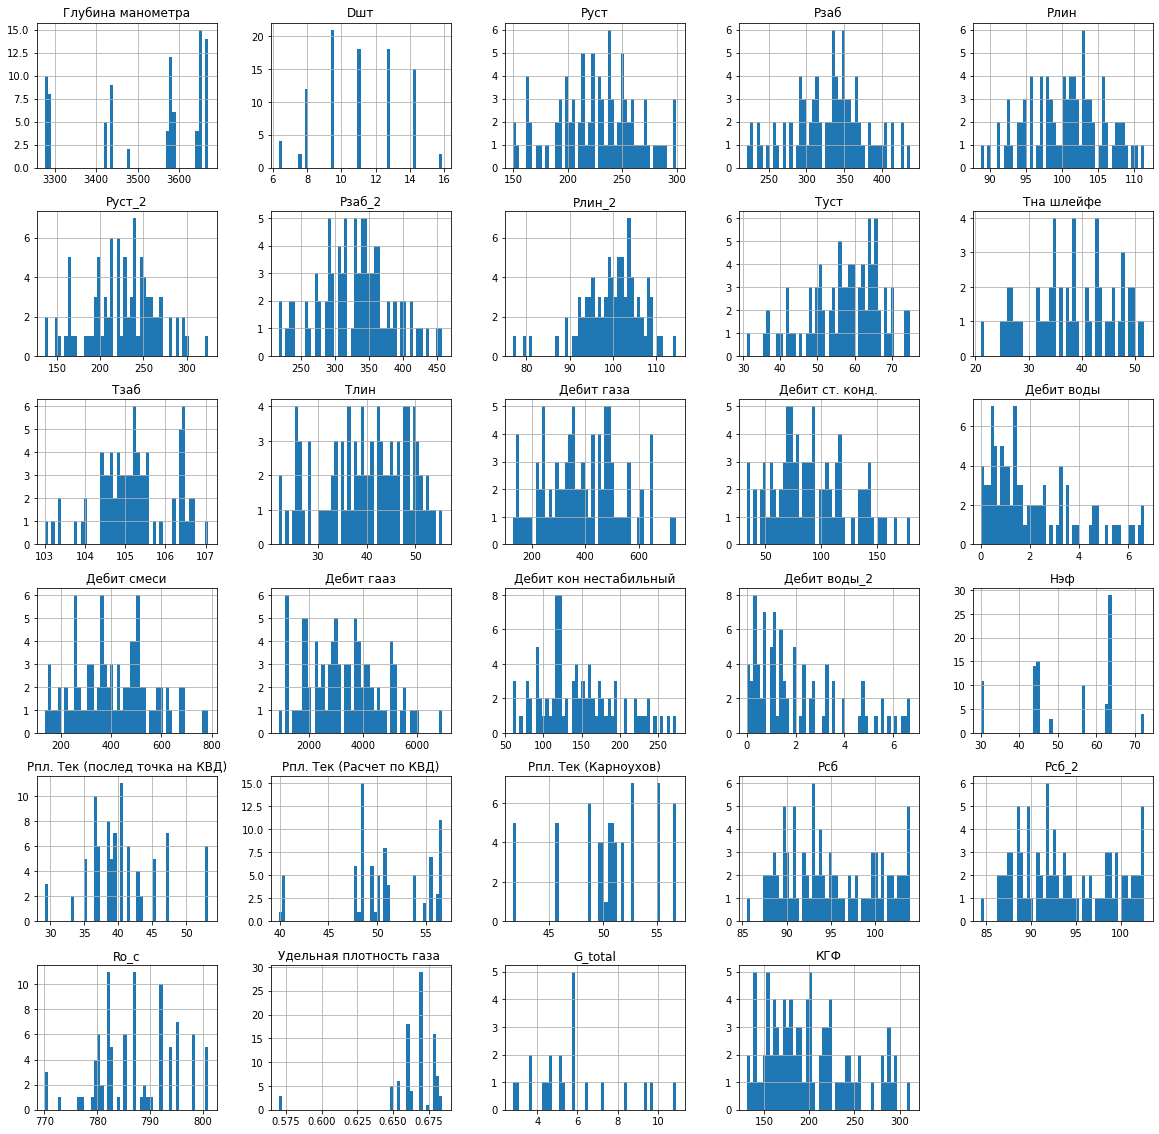

In [ ]:
# Избавляемся от выбросов

normal_dist = ['Руст', 'Рзаб', 'Рлин',  'Рлин_2', 'Дебит кон нестабильный']    
for i in cont_index:
  if i in normal_dist:
    bot = tab['Среднее'][i]-2*tab['Стандартное отклонение'][i]
    top = tab['Среднее'][i]+2*tab['Стандартное отклонение'][i]   
  else:
    x025 = tab['Первый квартиль(0.25)'][i]
    x075 = tab['Второй квартиль(0.75)'][i]
    bot = x025-1.5*(x075-x025)
    top = x075 + 1.5*(x075-x025)
  print(i,bot,top)
  for j,row in df.iterrows():
    if df[i][j]<bot or df[i][j]>top:
      print(j)
      if i == 'КГФ':
        df.drop(index = j, inplace=True)
      else:
        df[i][j] = float('nan')
    # if np.isnan(df[i][j])
    #   if tab['% пропусков'][i]<30:
    #     df[i][j] = tab['Медиана'][i]

df = df.reset_index(drop=True)
df.hist(bins=50,figsize=(20,20))
pass

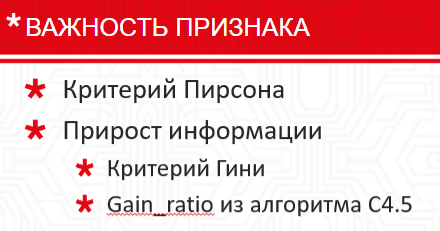

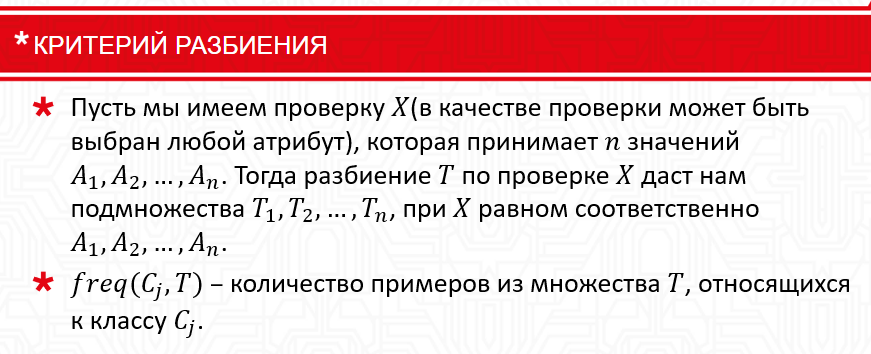

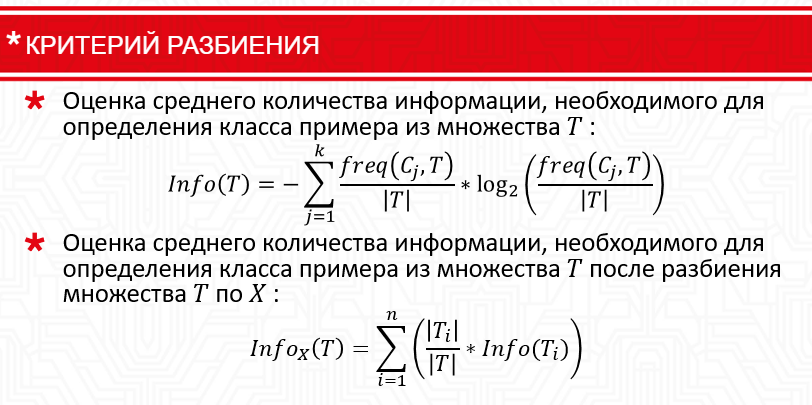

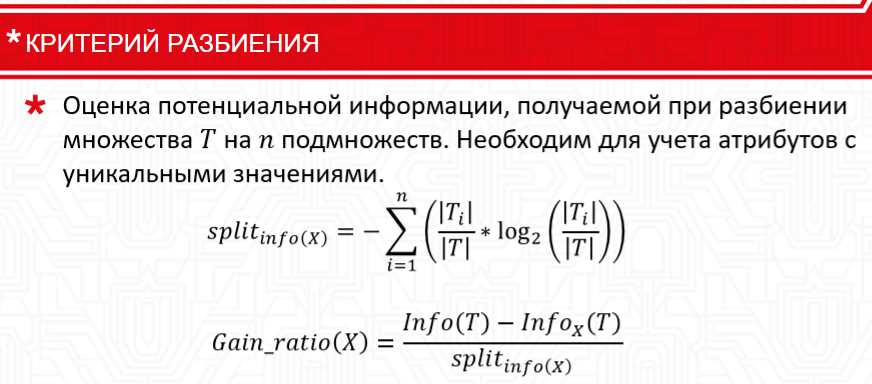

<Figure size 432x288 with 0 Axes>

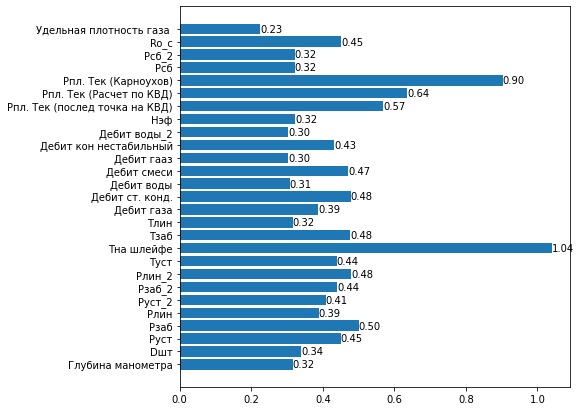

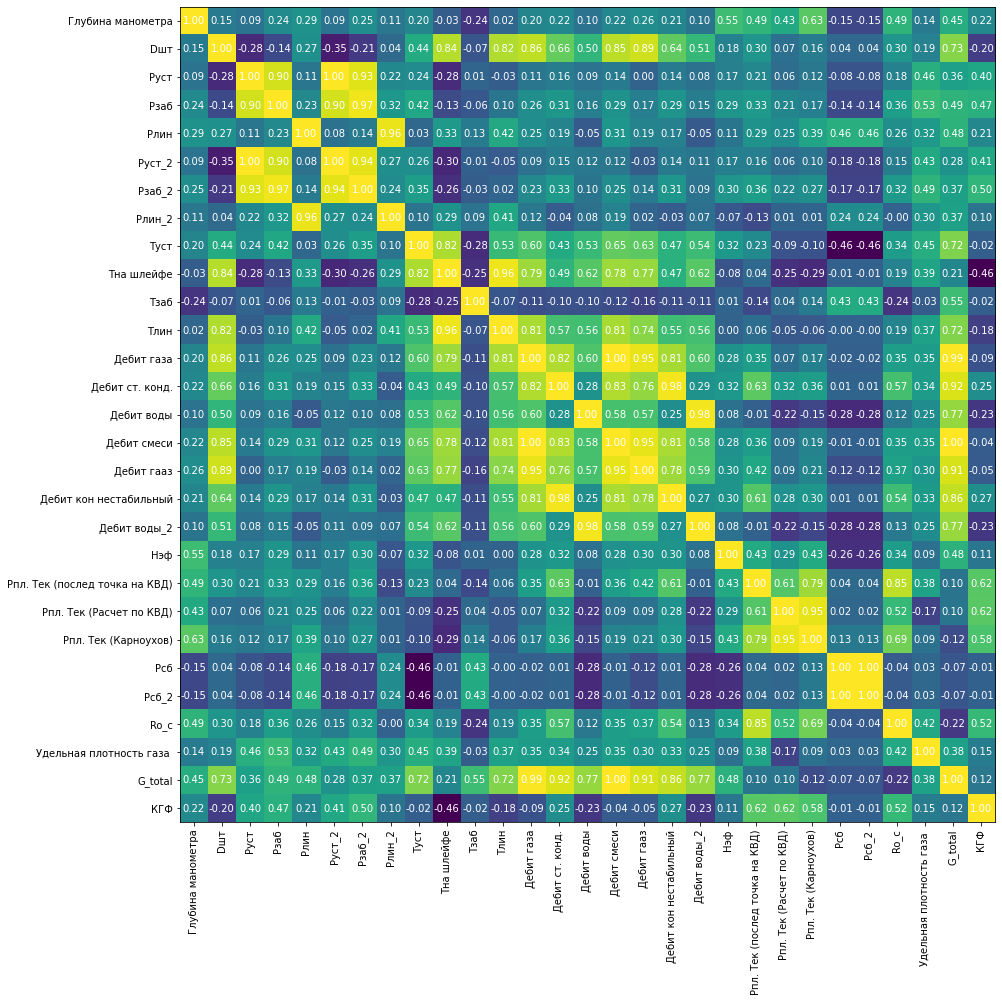

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

############ GAIN_RATIO ############

#Разбиение на интервалы
N = df.shape[0]
n = int(np.log2(N))+1      #Правило Стерджиса

ct = pd.DataFrame(index=df.index, columns = df.columns)              #Таблица разбиения
for column in ct:
  min = df[column].min()
  max = df[column].max()
  step = (max - min) /n
  for i in range(N):
    if not np.isnan(df[column][i]):
      interval = int((df[column][i]-min)/step)
      if interval==n:
        interval-=1
      ct[column][i] = interval 
    else:
      ct[column][i] = -1;
ct.astype('int32')
freq_T = np.zeros((n+1,n),dtype = int)                      #Количество примеров из множества T класса Cj - Кортеж КГФ и G_total
for i in range(N):
  freq_T[ct['G_total'][i]+1,ct['КГФ'][i]]+=1

info_T = 0                       #Оценка среднего количества информации для определения класса примера из T
for i in range(n+1):
  for j in range(n):
    ft = freq_T[i,j]
    if ft!=0:
      info_T -= (ft / N) * np.log2(ft / N)

gain_ratio = {}
for column in ct.columns:
  if column!='КГФ' and column != 'G_total':

    info_x_T = 0                                       #Оценка количеств информации после разбиения множества T по column
    split_info_x = 0
    for i in range(n):      #проходимся по классам разбиения
      Ni = 0
      freq_x_T = np.zeros_like(freq_T)               #Для каждого класса разбиения из column - мощности классов Cj   
      for j in range(N):
        x = ct[column][j]
        if x == i:
          Ni+=1
          freq_x_T[ct['G_total'][j]+1,ct['КГФ'][j]]+=1
      info_Ti = 0                                    #Оценка кол-ва информации для определения класса из Ti
      if Ni != 0:
        for i in range(n+1):
          for j in range(n):
            if freq_x_T[i,j]!= 0:
              info_Ti -= (freq_x_T[i,j]/ Ni) * np.log2(freq_x_T[i,j]/ Ni)
        info_x_T += (Ni / N) * info_Ti
        split_info_x -= (Ni / N) * np.log2((Ni / N))
    gain_ratio[column] = (info_T - info_x_T) / split_info_x

vals = list(gain_ratio.values())
length = len(vals)
keys = list(gain_ratio.keys())
fig, ax = plt.subplots(figsize=(7,7))
plt.barh(keys, vals, align='center')
for i in range(length):
    plt.annotate("%.2f"%vals[i], xy=(vals[i],keys[i]), va='center')
plt.show()  

######### Матрица корреляций #########
corr_matrix = df.corr().to_numpy()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(corr_matrix)
ax.xaxis.set(ticks=np.arange(len(df.columns)),ticklabels=df.columns)
ax.yaxis.set(ticks=np.arange(len(df.columns)),ticklabels=df.columns)
ax.xaxis.set_tick_params(rotation=90)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        ax.text(j, i, '{:.2f}'.format(corr_matrix[i, j]), ha='center', va='center',
                color='w')
plt.show()

In [ ]:
dropped = []
for i in range(len(df.columns)):
  col1 = df.columns[i]
  if col1!='КГФ' and col1 != 'G_total':
    for j in range(i):
      col2 = df.columns[j]
      if col2 in dropped:
        continue
      if col2!='КГФ' and col2 != 'G_total':
        if corr_matrix[i,j]>0.9:
          drop_f = True
          for k in range(len(df.columns)):
            col3 = df.columns[k]
            if col3 in dropped:
              continue
            if abs(corr_matrix[i,k]-corr_matrix[j,k]) > 0.25:
                    drop_f = False
          if drop_f:
            print(corr_matrix[i,j],col1,gain_ratio[col1],' - ',col2,gain_ratio[col2])
            if gain_ratio[col1]>gain_ratio[col2]:
              dropped.append(col2)
            else:
              dropped.append(col1)
print('dropped\n',dropped)
df.drop(columns=dropped, inplace=True)

0.9023587127857646 Рзаб 0.5008860190065693  -  Руст 0.45056755353399847
0.9007616669574263 Руст_2 0.40802446125743635  -  Рзаб 0.5008860190065693
0.9690957415265867 Рзаб_2 0.43973595952006894  -  Рзаб 0.5008860190065693
0.9989693180916152 Дебит смеси 0.4705390463960513  -  Дебит газа 0.3875417105032118
0.9470900516555096 Дебит гааз 0.3035290215375459  -  Дебит смеси 0.4705390463960513
0.9759559661783166 Дебит кон нестабильный 0.4316368437123323  -  Дебит ст. конд. 0.4774997740462497
0.9752727653802332 Дебит воды_2 0.30244690389103673  -  Дебит воды 0.3071018033499077
0.9999998444665325 Pсб_2 0.3212424086693025  -  Pсб 0.3212424086693025
dropped
 ['Руст', 'Руст_2', 'Рзаб_2', 'Дебит газа', 'Дебит гааз', 'Дебит кон нестабильный', 'Дебит воды_2', 'Pсб_2']


In [ ]:
df.drop(['Рпл. Тек (послед точка на КВД)','Рпл. Тек (Расчет по КВД)','Рпл. Тек (Карноухов)'],axis=1, inplace=True)

In [ ]:
df.to_csv('/content/data.csv',sep=';',index = False, encoding = 'windows-1251')